# Network Analysis

Comparing different pretrained models in terms of accuracy and performance

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
sns.set()

In [2]:
df = pd.read_csv("networks.csv")
df["Weight"] = df["Weight"].apply(lambda x: x.split(".")[0].replace("_Weights", "").replace("_", " "))
df = df[np.invert(df.duplicated(subset="Weight"))]
df.head()

,Weight,Acc@1,Acc@5,Params,GFLOPS
0,AlexNet,56.522,79.066,61100000.0,0.71
1,ConvNeXt Base,84.062,96.870,88600000.0,15.36
2,ConvNeXt Large,84.414,96.976,197800000.0,34.36
3,ConvNeXt Small,83.616,96.650,50200000.0,8.68
4,ConvNeXt Tiny,82.520,96.146,28600000.0,4.46


In [14]:
best = df.nlargest(10, "Acc@1").nsmallest(5, "GFLOPS")
best["Params"] = best["Params"].astype('int64') 
best

,Weight,Acc@1,Acc@5,Params,GFLOPS
20,EfficientNet V2 S,84.228,96.878,21500000,8.37
1,ConvNeXt Base,84.062,96.870,88600000,15.36
16,EfficientNet B6,84.008,96.916,43000000,19.07
89,Swin V2 B,84.112,96.864,87900000,20.32
19,EfficientNet V2 M,85.112,97.156,54100000,24.58


In [15]:
best.to_latex(index=False, float_format="{:.3f}".format, escape=False)

C:\Users\leona\AppData\Local\Temp\ipykernel_4104\563268228.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best.to_latex(index=False, float_format="{:.3f}".format, escape=False)


'\\begin{tabular}{lrrrr}\n\\toprule\n           Weight &  Acc@1 &  Acc@5 &   Params &  GFLOPS \\\\\n\\midrule\nEfficientNet V2 S & 84.228 & 96.878 & 21500000 &   8.370 \\\\\n    ConvNeXt Base & 84.062 & 96.870 & 88600000 &  15.360 \\\\\n  EfficientNet B6 & 84.008 & 96.916 & 43000000 &  19.070 \\\\\n        Swin V2 B & 84.112 & 96.864 & 87900000 &  20.320 \\\\\nEfficientNet V2 M & 85.112 & 97.156 & 54100000 &  24.580 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [4]:
noi = df.nlargest(10, "Acc@5").nsmallest(5, "GFLOPS")["Weight"].tolist()
noi.append("ResNet50")
noi.append("AlexNet")
noi.append("Inception V3")
noi

['EfficientNet V2 S',
 'ConvNeXt Base',
 'EfficientNet B6',
 'Swin V2 B',
 'EfficientNet V2 M',
 'ResNet50',
 'AlexNet',
 'Inception V3']

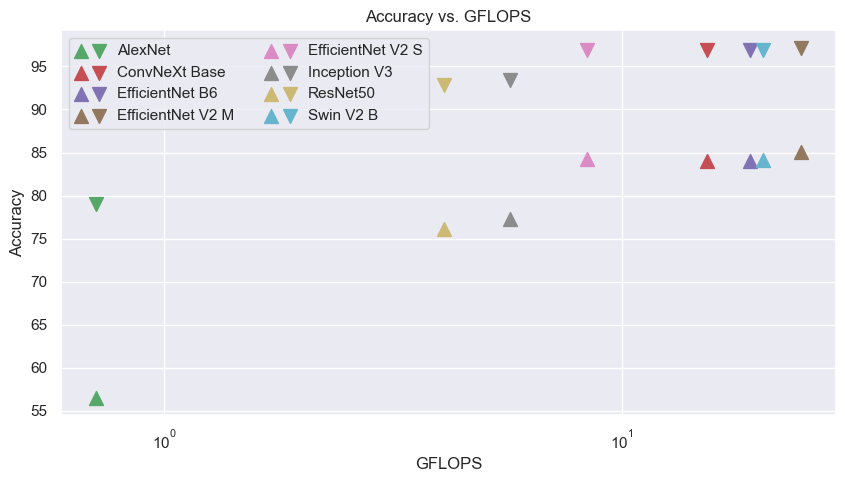

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

first = True

scatter_best = []
scatter_rest = []

col_id = 2

labels = []

for idx, row in df.iterrows():
    if not row["Weight"] in noi:
        if first:
            a = ax.scatter(row['GFLOPS'], row['Acc@1'], marker='^', edgecolors ="black", color="None", linewidth=0.3, label="Accuracy top 1", s=1)
            b = ax.scatter(row['GFLOPS'], row['Acc@5'], marker='v', edgecolors ="black", color="None", linewidth=0.3, label="Accuracy top 5", s=1)
            labels.append("Accuracy top 1")
            labels.append("Accuracy top 5")
            scatter_rest = [a,b]
            first = False
            
        ax.scatter(row['GFLOPS'], row['Acc@1'], marker='^', edgecolors ="black", color="None", linewidth=0.3, s=20)
        ax.scatter(row['GFLOPS'], row['Acc@5'], marker='v', edgecolors ="black", color="None", linewidth=0.3, s=20)

for idx, row in df.iterrows():
    if row["Weight"] in noi:
        # line = ax.scatter(row['GFLOPS'], row['Acc@1'], marker='.', label=row["Weight"], color=f"C{col_id}", s=1)
        ax.scatter(row['GFLOPS'], row['Acc@1'], marker='^', label=row["Weight"], color=f"C{col_id}", s=100)
        ax.scatter(row['GFLOPS'], row['Acc@5'], marker='v', label=row["Weight"], color=f"C{col_id}", s=100)
        a = ax.scatter(row['GFLOPS'], row['Acc@1'], marker='^', label=row["Weight"], color=f"C{col_id}", s=1)
        b = ax.scatter(row['GFLOPS'], row['Acc@5'], marker='v', label=row["Weight"], color=f"C{col_id}", s=1)
        labels.append(row["Weight"])
        scatter_best.append((a, b))
        col_id += 1

scatter = scatter_rest + scatter_best
ax.set_xscale("log")
ax.set_title("Accuracy vs. GFLOPS")
ax.legend(handles=scatter, labels=labels, ncols=2, markerscale=10, handler_map={tuple: HandlerTuple(ndivide=None)})
ax.set_xlabel("GFLOPS")
ax.set_ylabel("Accuracy")

plt.savefig("figures/network/networks.png")
plt.show()